In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv("bank-additional/bank-additional-full.csv", delimiter=';')

In [80]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [82]:
# check for each attribute the number of unknown values

for column in df.columns:
    i = 0
    for row in df[column]:
        if row == "unknown":
            i += 1

    print(column + ": " + str(i))

age: 0
job: 330
marital: 80
education: 1731
default: 8597
housing: 990
loan: 990
contact: 0
month: 0
day_of_week: 0
duration: 0
campaign: 0
pdays: 0
previous: 0
poutcome: 0
emp.var.rate: 0
cons.price.idx: 0
cons.conf.idx: 0
euribor3m: 0
nr.employed: 0
y: 0


<AxesSubplot:title={'center':'total yes'}>

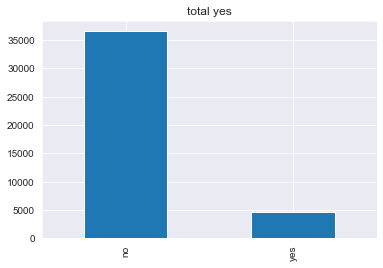

In [83]:
y_df = df["y"]
count = y_df.value_counts()
count.plot.bar(title = "total yes")

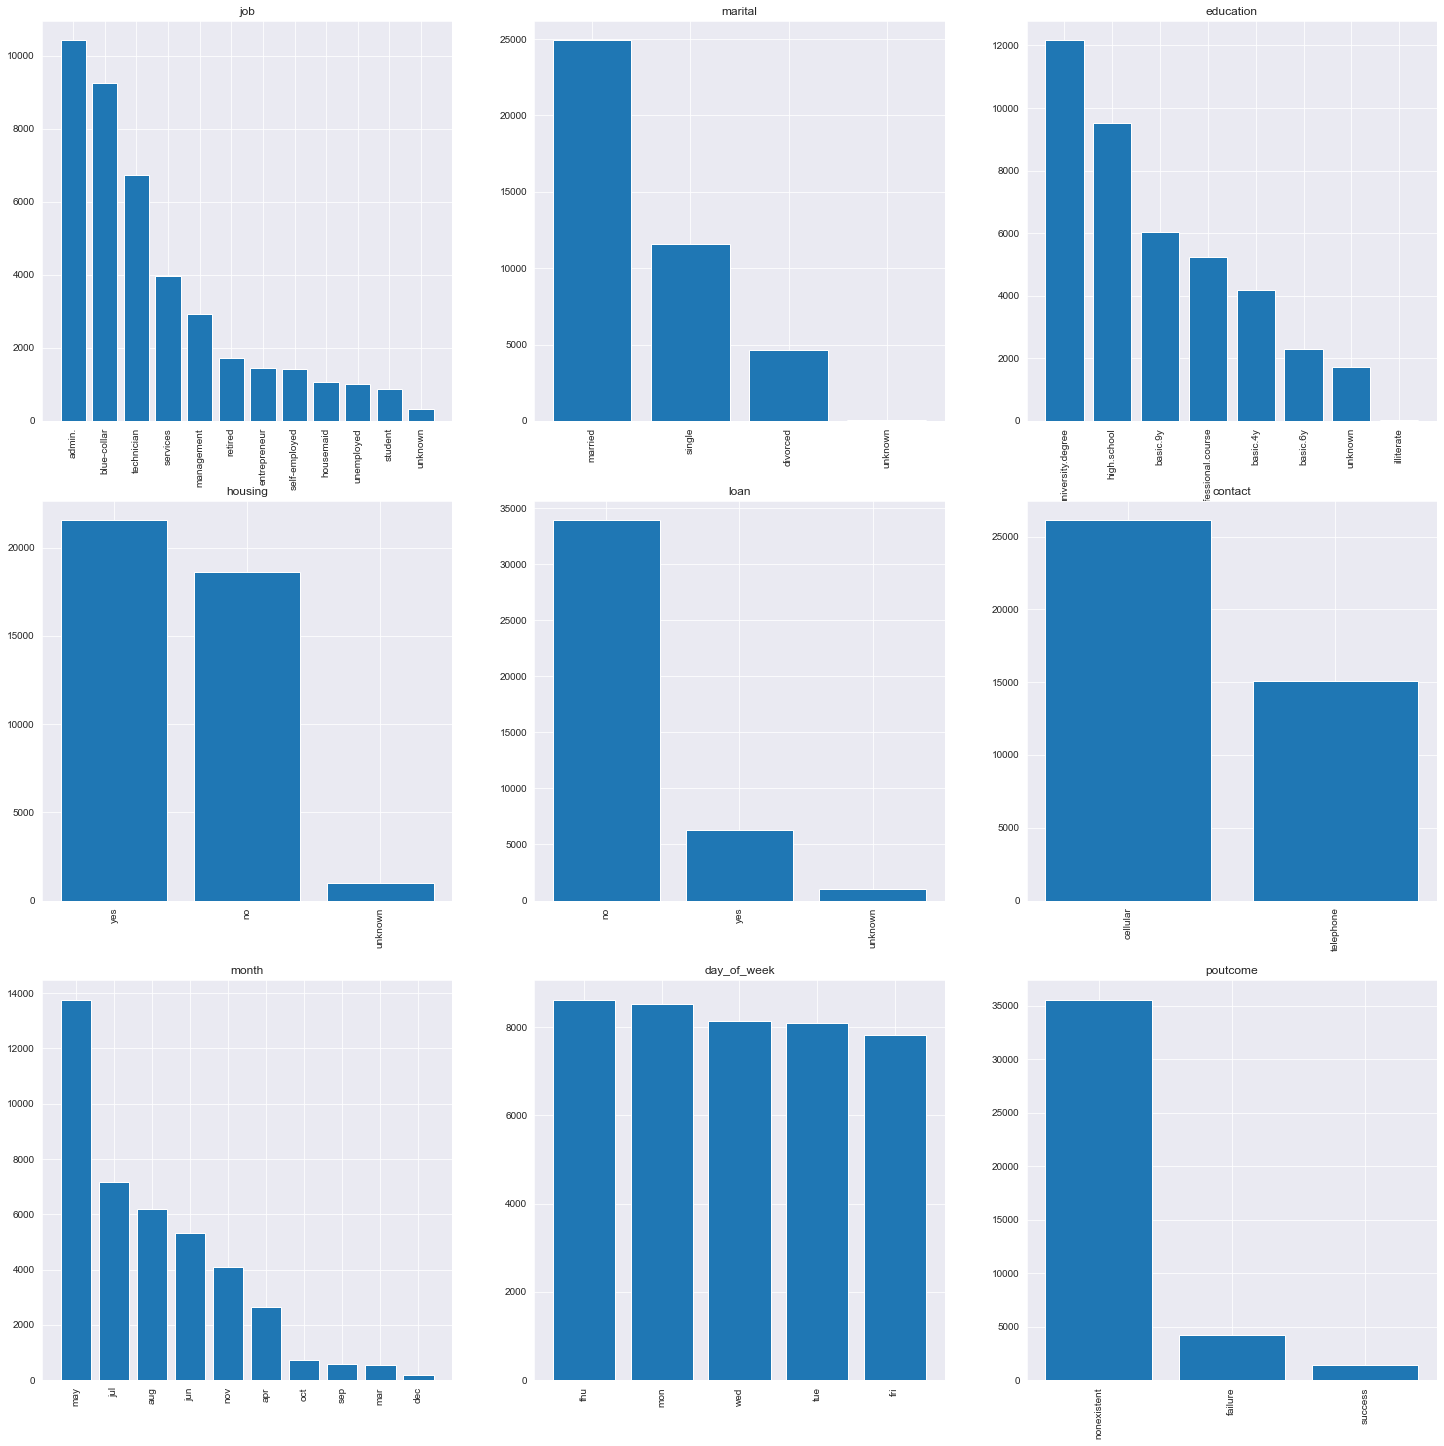

In [84]:
# categorical columns
# cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']
cat_columns = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', "day_of_week", "poutcome"]

fig, ax = plt.subplots(3, 3, figsize=(25, 25))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()

    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))

    ax[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)

    ax[trace_x, trace_y].set_title(cat_column)

    for tick in ax[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)

    counter += 1

plt.show()

unbalanced dataset (more no than yes)
poutcome to much "non existant" -> maybe drop
default basically no yes -> drop


In [85]:
p_df = df["pdays"]
p_df[p_df[:] == 999].count()

39673

pdays = 999 means "not contacted"
almost every line is 999 -> drop

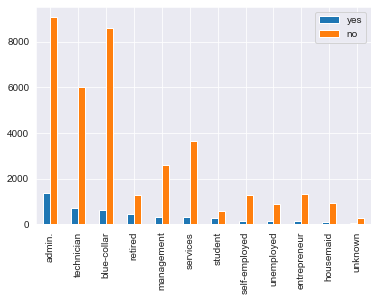

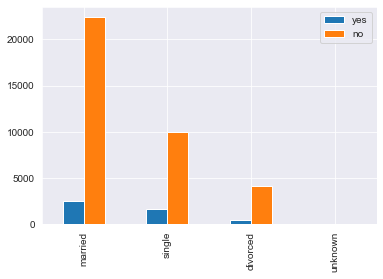

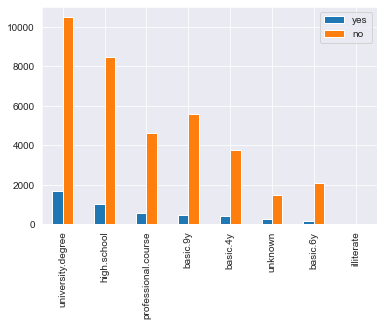

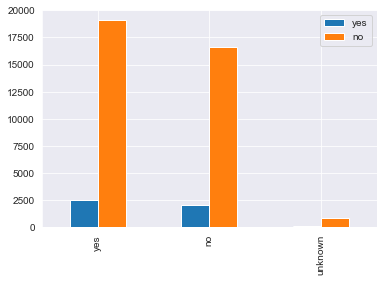

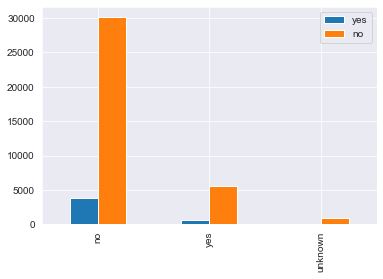

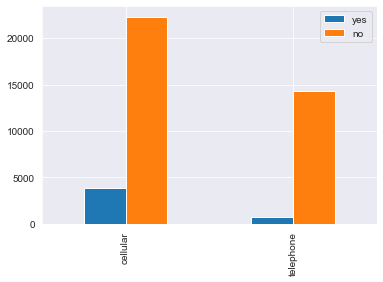

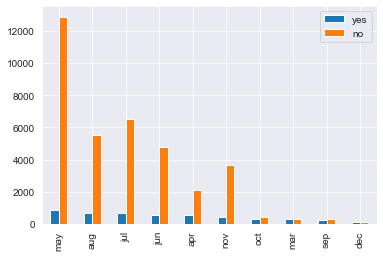

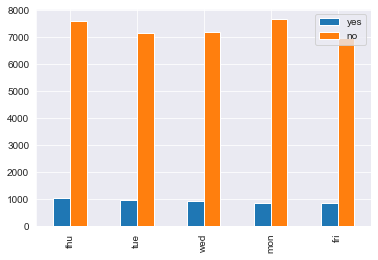

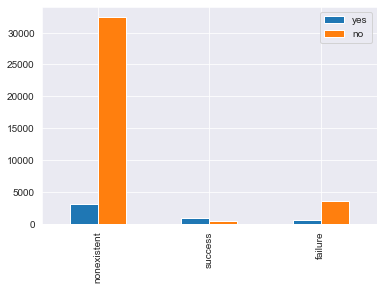

In [86]:
for cat_column in cat_columns:
    j_df = pd.DataFrame()
    j_df['yes'] = df[df['y'] == 'yes'][cat_column].value_counts()
    j_df['no'] = df[df['y'] == 'no'][cat_column].value_counts()

    j_df.plot.bar()

day_of_week gives us basically non information -> drop

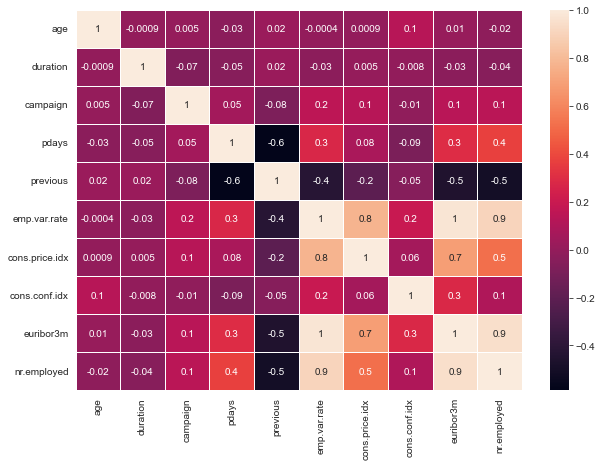

In [87]:
import seaborn as sns

fig = plt.figure(figsize=(10,7))
ax = sns.heatmap(df.corr(), annot=True, linewidth=0.5, fmt='.1g')

plt.show()

In [88]:
# drop_columns = ["poutcome", "default", "pdays", "duration"]
drop_columns = ["default", "pdays", "duration", "day_of_week"]
drop_df = df.drop(columns=drop_columns, axis=1)
drop_df.head()

,age,job,marital,education,housing,loan,contact,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [89]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   housing         41188 non-null  object 
 5   loan            41188 non-null  object 
 6   contact         41188 non-null  object 
 7   month           41188 non-null  object 
 8   campaign        41188 non-null  int64  
 9   previous        41188 non-null  int64  
 10  poutcome        41188 non-null  object 
 11  emp.var.rate    41188 non-null  float64
 12  cons.price.idx  41188 non-null  float64
 13  cons.conf.idx   41188 non-null  float64
 14  euribor3m       41188 non-null  float64
 15  nr.employed     41188 non-null  float64
 16  y               41188 non-null  object 
dtypes: float64(5), int64(3), object

In [91]:
# delete missing values (unknown)
# cat_columns = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month']
cat_columns = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', "poutcome", "y"]

for column in cat_columns:
    drop_df = drop_df.drop(drop_df[drop_df[column] == "unknown"].index)

drop_df = drop_df.reset_index(drop=True)

drop_df.head()

,age,job,marital,education,housing,loan,contact,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [92]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38245 entries, 0 to 38244
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38245 non-null  int64  
 1   job             38245 non-null  object 
 2   marital         38245 non-null  object 
 3   education       38245 non-null  object 
 4   housing         38245 non-null  object 
 5   loan            38245 non-null  object 
 6   contact         38245 non-null  object 
 7   month           38245 non-null  object 
 8   campaign        38245 non-null  int64  
 9   previous        38245 non-null  int64  
 10  poutcome        38245 non-null  object 
 11  emp.var.rate    38245 non-null  float64
 12  cons.price.idx  38245 non-null  float64
 13  cons.conf.idx   38245 non-null  float64
 14  euribor3m       38245 non-null  float64
 15  nr.employed     38245 non-null  float64
 16  y               38245 non-null  object 
dtypes: float64(5), int64(3), object

- map yes and no
- 1-hot encoding
- remove outlier ("age", "previous", "campaign")
- normalize numerical values (?)

In [93]:
def outlier_remover(df):
    df_t = df
    q_low = df_t["age"].quantile(0.01)
    q_hi  = df_t["age"].quantile(0.99)

    df_t = df_t.drop(df_t[((df_t["age"] > q_hi) | (df_t["age"] < q_low))].index)


    q_low = df_t["previous"].quantile(0.01)
    q_hi  = df_t["previous"].quantile(0.99)

    df_t = df_t.drop(df_t[((df_t["previous"] > q_hi) | (df_t["previous"] < q_low))].index)


    q_low = df_t["campaign"].quantile(0.01)
    q_hi  = df_t["campaign"].quantile(0.99)

    df_t = df_t.drop(df_t[((df_t["campaign"] > q_hi) | (df_t["campaign"] < q_low))].index)

    q_low = df_t["emp.var.rate"].quantile(0.01)
    q_hi  = df_t["emp.var.rate"].quantile(0.99)

    df_t = df_t.drop(df_t[((df_t["emp.var.rate"] > q_hi) | (df_t["emp.var.rate"] < q_low))].index)

    q_low = df_t["cons.price.idx"].quantile(0.01)
    q_hi  = df_t["cons.price.idx"].quantile(0.99)

    df_t = df_t.drop(df_t[((df_t["cons.price.idx"] > q_hi) | (df_t["cons.price.idx"] < q_low))].index)

    q_low = df_t["cons.conf.idx"].quantile(0.01)
    q_hi  = df_t["cons.conf.idx"].quantile(0.99)

    df_t = df_t.drop(df_t[((df_t["cons.conf.idx"] > q_hi) | (df_t["cons.conf.idx"] < q_low))].index)

    q_low = df_t["euribor3m"].quantile(0.01)
    q_hi  = df_t["euribor3m"].quantile(0.99)

    df_t = df_t.drop(df_t[((df_t["euribor3m"] > q_hi) | (df_t["euribor3m"] < q_low))].index)

    q_low = df_t["nr.employed"].quantile(0.01)
    q_hi  = df_t["nr.employed"].quantile(0.99)

    df_t = df_t.drop(df_t[((df_t["nr.employed"] > q_hi) | (df_t["nr.employed"] < q_low))].index)

    return df_t

clean_df = outlier_remover(drop_df)
clean_df = clean_df.reset_index(drop=True)
clean_df.head()

,age,job,marital,education,housing,loan,contact,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [94]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35466 entries, 0 to 35465
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             35466 non-null  int64  
 1   job             35466 non-null  object 
 2   marital         35466 non-null  object 
 3   education       35466 non-null  object 
 4   housing         35466 non-null  object 
 5   loan            35466 non-null  object 
 6   contact         35466 non-null  object 
 7   month           35466 non-null  object 
 8   campaign        35466 non-null  int64  
 9   previous        35466 non-null  int64  
 10  poutcome        35466 non-null  object 
 11  emp.var.rate    35466 non-null  float64
 12  cons.price.idx  35466 non-null  float64
 13  cons.conf.idx   35466 non-null  float64
 14  euribor3m       35466 non-null  float64
 15  nr.employed     35466 non-null  float64
 16  y               35466 non-null  object 
dtypes: float64(5), int64(3), object

In [95]:
noBinary_columns = ['job', 'marital', 'education', 'contact', 'month', "poutcome"] # categorical without the binary one

encoded_df = pd.get_dummies(clean_df, columns = noBinary_columns) # 1-hot encoding
encoded_df.head()

,age,housing,loan,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_dec,month_jul,month_jun,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,no,no,1,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,no,no,1,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,yes,no,1,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,no,no,1,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,no,yes,1,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [96]:
binary_columns = ['housing', 'loan', 'y']
yes_no_dict = {'yes':1, 'no':0, 'unknown': -1}
for col in binary_columns:
    encoded_df[col] = encoded_df[col].map(yes_no_dict)

encoded_df.head()

,age,housing,loan,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_dec,month_jul,month_jun,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,0,0,1,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,0,0,1,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,0,1,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,0,0,1,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,0,1,1,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


- Min-max normalization: Guarantees all features will have the exact same scale but does not handle outliers well.
- Z-score normalization: Handles outliers, but does not produce normalized data with the exact same scale.

we have already removed outliers so we use Z-score

In [97]:
num_columns = ["age", "previous", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
norm_df = encoded_df.copy()

for column in num_columns:
    norm_df[column] = (norm_df[column] -
                       norm_df[column].mean()) / norm_df[column].std()

norm_df.head()

,age,housing,loan,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_dec,month_jul,month_jun,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.750895,0,0,-0.691427,-0.348298,0.599415,0.748367,1.004121,0.659373,0.24275,...,0,0,0,1,0,0,0,0,1,0
1,1.857668,0,0,-0.691427,-0.348298,0.599415,0.748367,1.004121,0.659373,0.24275,...,0,0,0,1,0,0,0,0,1,0
2,-0.277795,1,0,-0.691427,-0.348298,0.599415,0.748367,1.004121,0.659373,0.24275,...,0,0,0,1,0,0,0,0,1,0
3,0.042524,0,0,-0.691427,-0.348298,0.599415,0.748367,1.004121,0.659373,0.24275,...,0,0,0,1,0,0,0,0,1,0
4,1.750895,0,1,-0.691427,-0.348298,0.599415,0.748367,1.004121,0.659373,0.24275,...,0,0,0,1,0,0,0,0,1,0


In [98]:
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35466 entries, 0 to 35465
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            35466 non-null  float64
 1   housing                        35466 non-null  int64  
 2   loan                           35466 non-null  int64  
 3   campaign                       35466 non-null  float64
 4   previous                       35466 non-null  float64
 5   emp.var.rate                   35466 non-null  float64
 6   cons.price.idx                 35466 non-null  float64
 7   cons.conf.idx                  35466 non-null  float64
 8   euribor3m                      35466 non-null  float64
 9   nr.employed                    35466 non-null  float64
 10  y                              35466 non-null  int64  
 11  job_admin.                     35466 non-null  uint8  
 12  job_blue-collar                35466 non-null 